In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)
veri1 = np.random.normal(10000, 1000, 500).astype(int)
veri2 = np.random.normal(9000, 900, 500).astype(int)
veri3 = np.random.normal(12000, 1200, 500).astype(int)
veri4 = np.random.normal(10000, 950, 500).astype(int)
df = pd.DataFrame(np.array([veri1,veri2,veri3,veri4]).T, columns=['A_once','B_once','A_sonra','B_sonra'])
olcum = df.copy()

In [11]:
olcum

A_once  B_once  A_sonra  B_sonra
0     10496    9833    13679    10739
1      9861   10718    13109     9476
2     10647    7741    12071     9222
3     11523    9506    11223     9996
4      9765    8414    12837     9838
..      ...     ...      ...      ...
495   10538    8747    14407    11016
496    8962   10617    14473     9974
497    9809    9576    13450     9162
498    9124    8485    13228     9845
499    8617    9515    12711     9292

[500 rows x 4 columns]

In [12]:
olcum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   A_once   500 non-null    int64
 1   B_once   500 non-null    int64
 2   A_sonra  500 non-null    int64
 3   B_sonra  500 non-null    int64
dtypes: int64(4)
memory usage: 15.8 KB


In [13]:
olcum.describe().T

count       mean          std  ...      50%       75%      max
A_once   500.0  10006.336   981.255496  ...  10012.5  10636.00  13852.0
B_once   500.0   9028.146   880.197872  ...   9025.0   9585.75  11369.0
A_sonra  500.0  12129.684  1212.298473  ...  12143.5  12905.50  15122.0
B_sonra  500.0  10031.004   934.875836  ...   9991.0  10664.50  13033.0

[4 rows x 8 columns]

In [14]:
olcum.describe([0.01,0.05,0.25,0.5,.75,.95,.99]).T

count       mean          std  ...       95%       99%      max
A_once   500.0  10006.336   981.255496  ...  11628.20  12191.24  13852.0
B_once   500.0   9028.146   880.197872  ...  10577.10  11201.08  11369.0
A_sonra  500.0  12129.684  1212.298473  ...  14073.50  14884.43  15122.0
B_sonra  500.0  10031.004   934.875836  ...  11534.45  12062.57  13033.0

[4 rows x 12 columns]

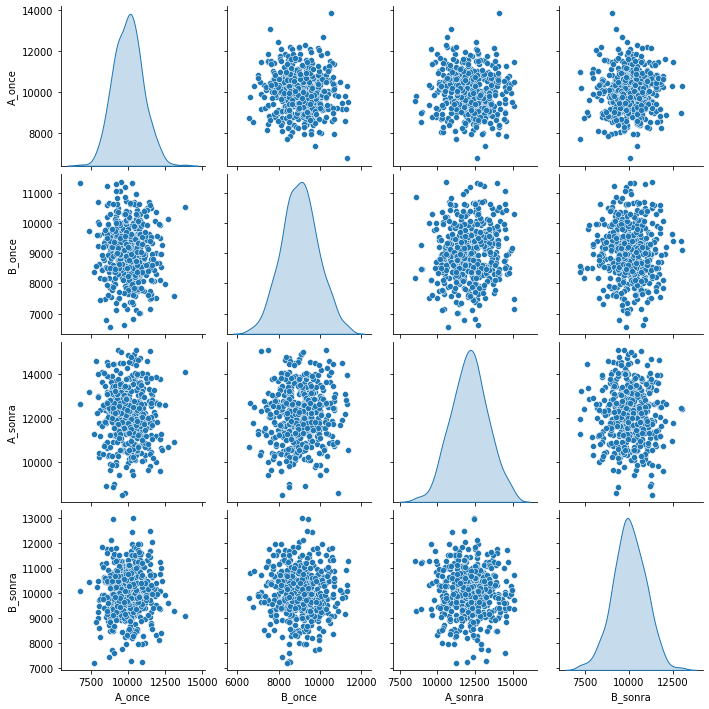

In [15]:
import seaborn as sns
sns.pairplot(olcum, diag_kind="kde")

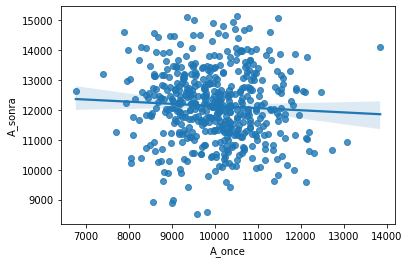

In [21]:
sns.regplot(x="A_once", y="A_sonra", ci=95, data=olcum)

3-Normallik testi
Verilerin normal dağılıp-dağılmadığını % 95 güvenle test edin (alfa=0,05 olarak almalısınız ve Shapira Wilk testi uygulayabilirsiniz)

Hipotezi kurun (H0 ve H1 Hipotezi. H0'in yokluk hipotezi olduğunu unutmayın. Yani normal dağılımla farkı yoktur gibi)

Kritik değere karar verin(alfa=0,05, % 95 güvenle gibi)

P_değeri ile alfayı kıyaslayın. (H0 red veya reddeilemez)

from scipy.stats import shapiro

t_değeri,p_değeri = shapiro(data_ismi)

In [2]:
from scipy.stats import shapiro
t_değeri,p_değeri = shapiro(olcum.A_once)

In [17]:
p_değeri

0.4010743498802185

In [18]:
t_değeri,p_değeri = shapiro(olcum.B_once)
p_değeri

0.6761667728424072

In [19]:
t_value, p_value = shapiro(olcum["A_once"])
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

0.9967007040977478 0.4010743498802185
The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.


In [22]:
t_value, p_value = shapiro(olcum["A_sonra"])
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

0.9972554445266724 0.5761163234710693
The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.


In [23]:
t_value, p_value = shapiro(olcum["B_once"])
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

0.9975419640541077 0.6761667728424072
The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.


In [24]:
t_value, p_value = shapiro(olcum["B_sonra"])
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

0.9972566962242126 0.5765427947044373
The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.


Tüm futbolcuların ortalama 10000 metre koştuğu iddiasını her bölge için ayrı ayrı test ediniz (Tek örneklem t veya z testi)

In [10]:
from scipy import stats

In [5]:
t_value, p_value = stats.ttest_1samp(olcum["A_once"], popmean = 10000 )
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

0.1443836673305787 0.8852558068210546
The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.


In [6]:
t_value, p_value = stats.ttest_1samp(olcum["A_sonra"], popmean = 10000 )
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

39.28173054055545 8.463124270966448e-155
H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.


In [7]:
t_value, p_value = stats.ttest_1samp(olcum["B_once"], popmean = 10000 )
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

-24.68912591338864 1.5530767757531843e-88
H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.


In [8]:
t_value, p_value = stats.ttest_1samp(olcum["B_sonra"], popmean = 10000 )
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

0.7415642684174482 0.45870023938366455
The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.


Herbir bölge için ayrı ayrı oyunculara uygulanan diyetlerin işe yarayıp yaramadığını test ediniz.(Bağımlı İki Örneklem t Testi)
test_değeri,p_değeri = stats.ttest_rel(değ1,değ2, equal_var = True)

In [12]:
t_value, p_value = stats.ttest_rel(olcum["A_once"],olcum["A_sonra"])
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

-29.616560617895175 5.3664592819786775e-112
H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.


In [13]:
t_value, p_value = stats.ttest_rel(olcum["B_once"],olcum["B_sonra"])
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

-17.279366523199087 8.88132208358409e-53
H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.


Diyet oncesi ve sonrası ayrı ayrı, her iki bölgedeki oyuncuların arasında anlamlı bir fark olup olmadığını test ediniz. (Bağımsız İki Örneklem t testi(AB Testi))
test_değeri,p_değeri = stats.ttest_ind(değ1,değ2, equal_var = True)


In [14]:
t_value, p_value = stats.ttest_ind(olcum["A_once"],olcum["B_once"])
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

16.59327027514793 8.564745398943361e-55
H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.


In [15]:
t_value, p_value = stats.ttest_ind(olcum["A_sonra"],olcum["B_sonra"])
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

30.65376921752174 5.947168761769308e-146
H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.
